<img style="float: left;" src="attachment:D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 2 Due 9/26 by Midnight ###

## Pandas basics ##
["Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."](https://pandas.pydata.org/)

First, let's introduce the three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

In [1]:
### standard imports
import numpy as np
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [98]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['Hola','Hey','My','Hor'])
data

Hola    0.25
Hey     0.50
My      0.75
Hor     1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [99]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [100]:
data.index

Index(['Hola', 'Hey', 'My', 'Hor'], dtype='object')

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [102]:
data[1]

0.25

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

To construct a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values. The index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [8]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [10]:
data[5]

0.5

### The Pandas Index Object

We have seen here that the ``Series`` object contains an explicit *index* that lets you reference and modify data. This ``Index`` object is an interesting structure in itself. As a simple example, let's construct an ``Index`` from a list of integers:

In [11]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [12]:
ind[1]

3

In [13]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [14]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [15]:
# this returns an error
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``. If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
You can think of a ``DataFrame`` as data table or spreadsheet with rows and columns, or as a sequence of aligned ``Series`` objects that share the same index.

In [16]:
state_index = pd.Index(['California','Texas','New York','Florida','Illinois'])

In [17]:
state_area = pd.Series([423967, 695662, 141297, 170312, 149995],
                 index = state_index)
state_area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [18]:
state_pop = pd.Series([38332521, 26448193, 19651127, 19552860, 12882135],
                 index = state_index)
state_pop

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [19]:
state_df = pd.DataFrame({"area": state_area, "population": state_pop})
state_df

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [20]:
state_df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

#### Read in Data Sources

Most of the time, you will not need to specify a dataframe by typing out all the data, instead you can read data from outside sources and save them as a datafame. 

Pandas has a number of very useful file reading tools. Most common one: pd.read_csv. 

In [21]:
# read in a csv file saved in the same folder as your ipynb file
# if your csv file is somewhere else, need to include file path
# for example: pd.read_csv("/Users/user_name/data_folder/data_file.csv")
elections = pd.read_csv("elections.csv")
elections 

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [22]:
# this pulls up a simple documentation of the function/method
?pd.read_csv

Read a table from a website

[padas.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): Read HTML tables into a list of DataFrame objects.

In [23]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/Greenhouse_gas")
dfs[4]  # read the 5th table on the page, why 5th?

,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteClimate change",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteClimate change.1"
0,Overview Attribution of recent climate change ...,Overview Attribution of recent climate change ...
1,Overview,Overview
2,Attribution of recent climate change Effects o...,Attribution of recent climate change Effects o...
3,CausesOverview Attribution of recent climate c...,CausesOverview Attribution of recent climate c...
4,Causes,Causes
5,Overview Attribution of recent climate change ...,Overview Attribution of recent climate change ...
6,Overview,Attribution of recent climate change Extreme e...
7,Sources,Greenhouse gases Greenhouse gas emissions Gree...
8,History History of climate change science Hist...,History History of climate change science Hist...
9,History,History


More in Pandas documentation: 

[padas.read_everything](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

[padas.DataFrame.method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

#### Looking at only a few rows

We can use the head command to return only a few rows of a dataframe.

In [24]:
# default return first 5 rows of your dataframe
elections.head(10)

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [25]:
elections.head(3)

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss


There is also a tail command.

In [26]:
# return the last 7 rows
elections.tail(7)

,Candidate,Party,%,Year,Result
18,McCain,Republican,45.7,2008,loss
19,Obama,Democratic,51.1,2012,win
20,Romney,Republican,47.2,2012,loss
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win
23,Biden,Democratic,51.3,2020,win
24,Trump,Republican,46.9,2020,loss


`df.sample` randomly sample a subset of rows WITHOUT replacement. Here's a random sample of 5 rows. Remember what is a simple random sample?

In [103]:
# Note I am seeding the sample so you can reproduce my results
# My favorite random seed is 7
elec_sample = elections.sample(5, random_state=7) 
elec_sample

,Candidate,Party,%,Year,Result
5,Bush,Republican,53.4,1988,win
21,Clinton,Democratic,48.2,2016,loss
15,Kerry,Democratic,48.3,2004,loss
3,Reagan,Republican,58.8,1984,win
17,Obama,Democratic,52.9,2008,win


Sampling with replacement

In [33]:
# if I don't set the random seed, you get differnt samples
# sample with replacement is also important, more on this later
elections.sample(10, replace=True) 

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
13,Gore,Democratic,48.4,2000,loss
24,Trump,Republican,46.9,2020,loss
5,Bush,Republican,53.4,1988,win
4,Mondale,Democratic,37.6,1984,loss
7,Clinton,Democratic,43.0,1992,win
4,Mondale,Democratic,37.6,1984,loss
19,Obama,Democratic,51.1,2012,win
19,Obama,Democratic,51.1,2012,win
14,Bush,Republican,47.9,2000,win


Sampling columns?

In [34]:
# you can also random sample columns, but not very useful
# axis=1 means columns instead of rows, 
# 2 is how many columns I want to sample
elections.sample(2, axis=1).head() 

,Party,%
0,Republican,50.7
1,Democratic,41.0
2,Independent,6.6
3,Republican,58.8
4,Democratic,37.6


#### Dataframe Utility Operations

In addition to `head`, `tail`, and `sample` the are a range of useful operations.

In [35]:
# df.columns return all column names
elections.columns

Index(['Candidate', 'Party', '%', 'Year', 'Result'], dtype='object')

The columns have data types.

In [36]:
# df.dtypes return data types for each column
elections.dtypes

Candidate     object
Party         object
%            float64
Year           int64
Result        object
dtype: object

Casting types. This changes the Year varaible from integer to float.

In [37]:
# df.astype for casting types
elections.astype({"Year": float}).head()

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980.0,win
1,Carter,Democratic,41.0,1980.0,loss
2,Anderson,Independent,6.6,1980.0,loss
3,Reagan,Republican,58.8,1984.0,win
4,Mondale,Democratic,37.6,1984.0,loss


You can access the rows as an array of lists

In [38]:
# strips away column names and row index
elections.values

array([['Reagan', 'Republican', 50.7, 1980, 'win'],
       ['Carter', 'Democratic', 41.0, 1980, 'loss'],
       ['Anderson', 'Independent', 6.6, 1980, 'loss'],
       ['Reagan', 'Republican', 58.8, 1984, 'win'],
       ['Mondale', 'Democratic', 37.6, 1984, 'loss'],
       ['Bush', 'Republican', 53.4, 1988, 'win'],
       ['Dukakis', 'Democratic', 45.6, 1988, 'loss'],
       ['Clinton', 'Democratic', 43.0, 1992, 'win'],
       ['Bush', 'Republican', 37.4, 1992, 'loss'],
       ['Perot', 'Independent', 18.9, 1992, 'loss'],
       ['Clinton', 'Democratic', 49.2, 1996, 'win'],
       ['Dole', 'Republican', 40.7, 1996, 'loss'],
       ['Perot', 'Independent', 8.4, 1996, 'loss'],
       ['Gore', 'Democratic', 48.4, 2000, 'loss'],
       ['Bush', 'Republican', 47.9, 2000, 'win'],
       ['Kerry', 'Democratic', 48.3, 2004, 'loss'],
       ['Bush', 'Republican', 50.7, 2004, 'win'],
       ['Obama', 'Democratic', 52.9, 2008, 'win'],
       ['McCain', 'Republican', 45.7, 2008, 'loss'],
       ['O

Shape returns the number of rows and columns.

In [40]:
# df.shape returns number of rows and columns
x,y=elections.shape

In [41]:
x

25

Size describes the number of "cells" in the dataframe

In [42]:
# df.size return total number of "cells": number of rows timws number of columns
elections.size

125

We can rename columns:

`df.rename(columns={"column_name_old": "column_name_new"})`

In [43]:
# df.rename syntax need to input a dictionary 
elections.rename(columns={"%": "Percent"})
elections.head()

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


**Note** that the `rename` method returned a new dataframe and didn't modify the original one. This means it is not mutating. If you need to have the change in the original dataframe, you can give this new dataframe the original name, or do `inplace=True`. 

**Most operations in Pandas are not mutating.** This produces cleaner code.  If you change something it should be stored in a new appropriately named variable.  

#### Counting unique values in a series

Series also has a very useful function `.value_counts()` which allows us to compute the number of occurences of each unique value.

In [129]:
party_counts = elections['Party'].value_counts()
party_counts

Republican     11
Democratic     11
Independent     3
Name: Party, dtype: int64

In [125]:
party_counts['Republican']

11

In [130]:
# this is still a series
type(party_counts)

pandas.core.series.Series

Note that in each case we also got back a series and these series (like all series) are maps from index to value.

In [131]:
party_counts.index

Index(['Republican', 'Democratic', 'Independent'], dtype='object')

In [132]:
party_counts.values

array([11, 11,  3])

In [133]:
party_counts["Independent"]

3

#### Dataframe Selecting Rows and Columns

In [134]:
# select column by column names, this returns a series
elections["Candidate"]

0       Reagan
1       Carter
2     Anderson
3       Reagan
4      Mondale
5         Bush
6      Dukakis
7      Clinton
8         Bush
9        Perot
10     Clinton
11        Dole
12       Perot
13        Gore
14        Bush
15       Kerry
16        Bush
17       Obama
18      McCain
19       Obama
20      Romney
21     Clinton
22       Trump
23       Biden
24       Trump
Name: Candidate, dtype: object

In [135]:
# select multiple columns, put column names in a list [col1, col2, ...]
# this returns a dataframe
elections[["Candidate", "Party"]]

,Candidate,Party
0,Reagan,Republican
1,Carter,Democratic
2,Anderson,Independent
3,Reagan,Republican
4,Mondale,Democratic
5,Bush,Republican
6,Dukakis,Democratic
7,Clinton,Democratic
8,Bush,Republican
9,Perot,Independent


In [136]:
# this returns a dataframe!
elections[["Candidate"]]

,Candidate
0,Reagan
1,Carter
2,Anderson
3,Reagan
4,Mondale
5,Bush
6,Dukakis
7,Clinton
8,Bush
9,Perot


If you pass a single item instead of a list you get back a `Series`

In [137]:
party = elections["Party"]
party

0      Republican
1      Democratic
2     Independent
3      Republican
4      Democratic
5      Republican
6      Democratic
7      Democratic
8      Republican
9     Independent
10     Democratic
11     Republican
12    Independent
13     Democratic
14     Republican
15     Democratic
16     Republican
17     Democratic
18     Republican
19     Democratic
20     Republican
21     Democratic
22     Republican
23     Democratic
24     Republican
Name: Party, dtype: object

When accessing a single column we get back a `pd.Series` object

In [138]:
type(party)

pandas.core.series.Series

The series object represents a single column (or row) of data.  The `Series` object has a `index`, a `name`, and `values`.  A series can be thought of as a map.

In [139]:
party.index

RangeIndex(start=0, stop=25, step=1)

In [140]:
party.name

'Party'

In [141]:
party.values

array(['Republican', 'Democratic', 'Independent', 'Republican',
       'Democratic', 'Republican', 'Democratic', 'Democratic',
       'Republican', 'Independent', 'Democratic', 'Republican',
       'Independent', 'Democratic', 'Republican', 'Democratic',
       'Republican', 'Democratic', 'Republican', 'Democratic',
       'Republican', 'Democratic', 'Republican', 'Democratic',
       'Republican'], dtype=object)

We can convert a Series into a DataFrame

In [142]:
party.to_frame()

,Party
0,Republican
1,Democratic
2,Independent
3,Republican
4,Democratic
5,Republican
6,Democratic
7,Democratic
8,Republican
9,Independent


In [143]:
# select rows by row index
elections[:5]

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


In [144]:
elections[4:10]

,Candidate,Party,%,Year,Result
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [145]:
elections[20:]

,Candidate,Party,%,Year,Result
20,Romney,Republican,47.2,2012,loss
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win
23,Biden,Democratic,51.3,2020,win
24,Trump,Republican,46.9,2020,loss


In [146]:
# Select the row and column at the same time.
elections[["Candidate"]][:3]

,Candidate
0,Reagan
1,Carter
2,Anderson


In [147]:
# the same functionality
elections[:3][["Candidate"]]

,Candidate
0,Reagan
1,Carter
2,Anderson


In [152]:
# subset by Boolean, filtering!
elec_dem = elections[elections["Party"] == "Democratic"]
elec_dem.head()


,Candidate,Party,%,Year,Result
1,Carter,Democratic,41.0,1980,loss
4,Mondale,Democratic,37.6,1984,loss
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win


In [153]:
# returns a DataFrame with Democratic winning election
elections[
    (elections["Party"] == "Democratic") & 
    (elections["Result"] == "win")]

,Candidate,Party,%,Year,Result
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win
17,Obama,Democratic,52.9,2008,win
19,Obama,Democratic,51.1,2012,win
23,Biden,Democratic,51.3,2020,win


In [154]:
# winning with voting percentage smaller than 50%
elections[
    (elections['Result'] == 'win') & 
    (elections['%'] < 50)
]

,Candidate,Party,%,Year,Result
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win
14,Bush,Republican,47.9,2000,win
22,Trump,Republican,46.1,2016,win


Using the logical negation `~` operator (not).  

In [150]:
# winning with voting percentage greater than or equal to 50%
elections[
    (elections['Result'] == 'win') & 
    ~(elections['%'] < 50)
]

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
3,Reagan,Republican,58.8,1984,win
5,Bush,Republican,53.4,1988,win
16,Bush,Republican,50.7,2004,win
17,Obama,Democratic,52.9,2008,win
19,Obama,Democratic,51.1,2012,win
23,Biden,Democratic,51.3,2020,win


The | operator is the symbol for or.

In [155]:
# not (Dem or Rep) = (not Dem) and (not Rep)
elections[
    ~((elections['Party'] == "Democratic") | 
        (elections['Party'] == "Republican"))
]

,Candidate,Party,%,Year,Result
2,Anderson,Independent,6.6,1980,loss
9,Perot,Independent,18.9,1992,loss
12,Perot,Independent,8.4,1996,loss


If we have multiple conditions (say Republican or Democratic), we can use the isin operator to simplify our code.

In [156]:
# isin here is same as Dem or Rep
elections[elections['Party'].isin(["Republican", "Democratic"])]

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
10,Clinton,Democratic,49.2,1996,win
11,Dole,Republican,40.7,1996,loss


#### Column Assignment (Mutating)

You can modify and even add columns using the square brackets `[ ]` 

In [157]:
elections["Year"] = elections["Year"] * -1
elections

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,-1980,win
1,Carter,Democratic,41.0,-1980,loss
2,Anderson,Independent,6.6,-1980,loss
3,Reagan,Republican,58.8,-1984,win
4,Mondale,Democratic,37.6,-1984,loss
5,Bush,Republican,53.4,-1988,win
6,Dukakis,Democratic,45.6,-1988,loss
7,Clinton,Democratic,43.0,-1992,win
8,Bush,Republican,37.4,-1992,loss
9,Perot,Independent,18.9,-1992,loss


Adding a new column by assignment:

In [158]:
elections["Corrected Year"] = elections["Year"] * -1
elections

,Candidate,Party,%,Year,Result,Corrected Year
0,Reagan,Republican,50.7,-1980,win,1980
1,Carter,Democratic,41.0,-1980,loss,1980
2,Anderson,Independent,6.6,-1980,loss,1980
3,Reagan,Republican,58.8,-1984,win,1984
4,Mondale,Democratic,37.6,-1984,loss,1984
5,Bush,Republican,53.4,-1988,win,1988
6,Dukakis,Democratic,45.6,-1988,loss,1988
7,Clinton,Democratic,43.0,-1992,win,1992
8,Bush,Republican,37.4,-1992,loss,1992
9,Perot,Independent,18.9,-1992,loss,1992


In [165]:
?np.random.randn

remember what does `df.shape[0]` return?

In [163]:
# what is elections.shape[0]
elections["Random Numbers"] = np.random.randn(elections.shape[0])
elections

,Candidate,Party,%,Year,Result,Corrected Year,Random Numbers
0,Reagan,Republican,50.7,-1980,win,1980,1.213126
1,Carter,Democratic,41.0,-1980,loss,1980,0.075428
2,Anderson,Independent,6.6,-1980,loss,1980,-1.126263
3,Reagan,Republican,58.8,-1984,win,1984,0.448632
4,Mondale,Democratic,37.6,-1984,loss,1984,0.935119
5,Bush,Republican,53.4,-1988,win,1988,-0.713627
6,Dukakis,Democratic,45.6,-1988,loss,1988,-1.627906
7,Clinton,Democratic,43.0,-1992,win,1992,0.206052
8,Bush,Republican,37.4,-1992,loss,1992,0.747324
9,Perot,Independent,18.9,-1992,loss,1992,-0.089343


In [166]:
# The statistics for the columns
# notice it only computes columns with numerical values
elections.mean()

/var/folders/_6/l3fpk3z10lb5g2csy8ykd4lw0000gn/T/ipykernel_72267/390305531.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  elections.mean()


%                   43.040000
Year             -1998.720000
Corrected Year    1998.720000
Random Numbers      -0.185557
dtype: float64

In [167]:
elec_num = elections[["%", "Random Numbers"]]
elec_num.median()

%                 47.200000
Random Numbers     0.075428
dtype: float64

In [168]:
elec_num.max()

%                 58.800000
Random Numbers     1.213126
dtype: float64

In [169]:
elec_num.min()

%                 6.600000
Random Numbers   -1.839928
dtype: float64

In [170]:
elec_num.std()

%                 13.046136
Random Numbers     0.863061
dtype: float64

In [171]:
# We could also calculate the statistics for a specific colum
elections["Random Numbers"].mean()

-0.18555742889084959

In [172]:
elections["Random Numbers"].var()

0.7448749949422346

This is just a very brief intruduction to Pandas. For more resources:
- [10 min to Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html#min)
- [Pandas cookbook](https://pandas.pydata.org/pandas-docs/version/0.15/cookbook.html#cookbook)
- [Pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Please write your code with appropriate comments and informative names. Feel free to insert more cells as you see necessary. 

**Question 1**: The file `imdb.csv` contains a table of information about the 250 highest-rated movies on IMDb.  Load it as a dataframe called `imdb`.

In [45]:
imdb = pd.read_csv("imdb.csv")
imdb

,Votes,Rating,Title,Year,Decade
0,88355,8.4,M,1931,1930
1,132823,8.3,Singin' in the Rain,1952,1950
2,74178,8.3,All About Eve,1950,1950
3,635139,8.6,Léon,1994,1990
4,145514,8.2,The Elephant Man,1980,1980
...,...,...,...,...,...
245,1078416,8.7,Forrest Gump,1994,1990
246,31003,8.1,Le salaire de la peur,1953,1950
247,167076,8.2,3 Idiots,2009,2000
248,91689,8.1,Network,1976,1970


**Question 2**:
Compute the average rating of movies from the 1940s.

*Hint:* The function `np.average` or `np.mean` can compute the average of an array of numbers.

In [178]:
forties = imdb[(imdb['Year']>=1940) & (imdb['Year']<1950)]

In [179]:
average_rating_in_forties = np.average(forties['Rating'])
average_rating_in_forties

8.257142857142856

**Question 3**:
Create a dataframe called `ninety_nine` containing the movies that came out in the year 1999.

In [62]:
ninety_nine = imdb[imdb['Year']==1999]
ninety_nine

,Votes,Rating,Title,Year,Decade
87,1177098,8.8,Fight Club,1999,1990
104,735056,8.4,American Beauty,1999,1990
115,630994,8.1,The Sixth Sense,1999,1990
129,1073043,8.7,The Matrix,1999,1990
149,672878,8.5,The Green Mile,1999,1990


**Question 4**:
Using Boolean filtering to find all the movies with a rating higher than 8.5. Assign this filtered table to the name `really_highly_rated`.

In [183]:
really_highly_rated = imdb[imdb['Rating']>8.5]
really_highly_rated

,Votes,Rating,Title,Year,Decade
3,635139,8.6,Léon,1994,1990
22,1027398,9.2,The Godfather,1972,1970
47,767224,8.6,The Silence of the Lambs,1991,1990
53,1498733,9.2,The Shawshank Redemption,1994,1990
57,447875,8.9,"Il buono, il brutto, il cattivo (1966)",1966,1960
68,967389,8.7,The Lord of the Rings: The Two Towers,2002,2000
70,689541,8.6,Interstellar,2014,2010
76,1473049,8.9,The Dark Knight,2008,2000
78,192206,8.6,C'era una volta il West,1968,1960
81,1271949,8.7,Inception,2010,2010


**Question 5**:
Find the average rating for movies released before the year 2000 and the average rating for movies released in the year 2000 or after for the movies in `imdb`.

*Hint*: Think of the steps you need to do (take the average, find the ratings, find movies released in 20th/21st centuries), and try to put them in an order that makes sense.

In [187]:
movies_20th_century = imdb[imdb['Year']<2000]
movies_21st_century = imdb[imdb['Year']>=2000]

rating_20th_century = movies_20th_century['Rating']
rating_21st_century = movies_21st_century['Rating']

avg_rating_in_20th_century = rating_20th_century.mean()
avg_rating_in_21st_century = rating_20th_century.mean()
print("Average rating in 20th century:", avg_rating_in_20th_century)
print("Average rating in 21st century:", avg_rating_in_21st_century)

Average rating in 20th century: 8.278362573099418
Average rating in 21st century: 8.278362573099418


In [71]:
avg_rating_in_20th_century = np.average(imdb[imdb['Year']<2000]['Rating'])
avg_rating_in_21st_century = np.average(imdb[imdb['Year']>=2000]['Rating'])
print("Average rating in 20th century:", avg_rating_in_20th_century)
print("Average rating in 21st century:", avg_rating_in_21st_century)

Average rating in 20th century: 8.278362573099415
Average rating in 21st century: 8.237974683544303


**Question 6**:
Here's a challenge: Find the number of movies that came out in *even* years.

*Hint:* The operator `%` computes the remainder when dividing by a number.  So `5 % 2` is 1 and `6 % 2` is 0.  A number is even if the remainder is 0 when you divide by 2.

*Hint 2:* `%` can be used on arrays, operating elementwise like `+` or `*`.  So `make_array(5, 6, 7) % 2` is `array([1, 0, 1])`.

In [190]:
even_years_movies = imdb[imdb['Year']%2==0]
num_even_year_movies = even_years_movies['Year'].count()
num_even_year_movies

127

**Question 7**:
Calculate the mean, median and standard deviation of the ratings for the 250 movies.

*Hint:* You can use numpy function `np.mean`, `np.median` and `np.std`. 

In [194]:
rating_mean = np.mean(imdb['Rating'])
rating_median = np.median(imdb['Rating'])
rating_sd = np.std(imdb['Rating'])
print({"mean": rating_mean, "median": rating_median, "standard deviation": rating_sd})

{'mean': 8.265599999999997, 'median': 8.2, 'standard deviation': 0.24383732281994888}


**Question 8**:
Creat a random sample of 50 movies (sample without replacement).

In [206]:
imdb_sample = imdb.sample(50, replace= False) 
imdb_sample

,Votes,Rating,Title,Year,Decade
149,672878,8.5,The Green Mile,1999,1990
141,1074146,8.9,The Lord of the Rings: The Return of the King,2003,2000
196,164419,8.0,Dog Day Afternoon,1975,1970
104,735056,8.4,American Beauty,1999,1990
10,56842,8.1,It Happened One Night,1934,1930
42,309141,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,1964,1960
94,376590,8.3,L.A. Confidential,1997,1990
6,441174,8.1,Gone Girl,2014,2010
249,589477,8.3,Eternal Sunshine of the Spotless Mind,2004,2000
35,56671,8.0,The Killing,1956,1950


**Question 9**:
Calculate the same statistics of the rating: mean, median and sd for the random sample. 

In [207]:
sample_mean = np.mean(imdb_sample['Rating'])
sample_median = np.median(imdb_sample['Rating'])
sample_sd = np.std(imdb_sample['Rating'])
print({"sample mean": sample_mean, "sample median": sample_median, "sample sd": sample_sd})

{'sample mean': 8.228000000000002, 'sample median': 8.1, 'sample sd': 0.23836107064703344}


**Question 10**:
Repeat the process in Question 8 and 9 a 1000 times, and save the results in 3 lists: `sample_mean_list`, `sample_median_list` and `sample_sd_list`. Then run the following code to visualize the sampling distribution of those statistics and compare to the population values.

In [208]:
sample_mean_list = []
sample_median_list = []
sample_sd_list = []

rep = 1000
for i in range(1000):
    imdb_sample = imdb.sample(50, replace = False)
    sample_mean = np.mean(imdb_sample['Rating'])
    sample_median = np.median(imdb_sample['Rating'])
    sample_sd = np.std(imdb_sample['Rating'])
    sample_mean_list = np.append(sample_mean_list, sample_mean)
    sample_median_list = np.append(sample_median_list, sample_median)
    sample_sd_list = np.append(sample_sd_list, sample_sd)

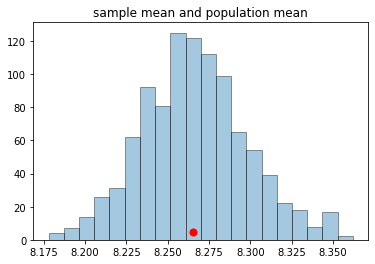

In [210]:
plt.hist(sample_mean_list, bins=20, alpha=0.4)
plt.scatter(rating_mean, 5, color='red', s=50)
plt.title("sample mean and population mean");

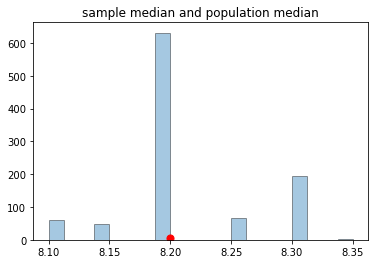

In [211]:
plt.hist(sample_median_list, bins=20, alpha=0.4)
plt.scatter(rating_median, 5, color='red', s=50)
plt.title("sample median and population median");

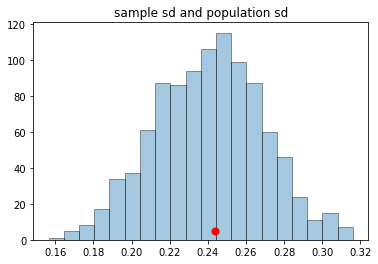

In [212]:
plt.hist(sample_sd_list, bins=20, alpha=0.4)
plt.scatter(rating_sd, 5, color='red', s=50)
plt.title("sample sd and population sd");

**Question 11**: 
Here are some common random variables (distributions) with their mean and variance listed. Pick one distribution and derive the mean and the variance. You can look up the PMF or PDF for these distributions! 

$$
\begin{array}{lll}
\text{Random Variable / Distribution} & \text{Mean} & \text{Variance}           \\
\hline
\text{Bernoulli}(p)          & p             & p(1-p)         \\
\text{Binomial}(n, p)        & np            & np(1-p)        \\
\text{Poisson}(\lambda)      & \lambda       & \lambda        \\
\text{Uniform}(a, b)         & (a + b) / 2   & (b - a)^2 / 12 \\
\text{Normal}(\mu, \sigma^2) & \mu           & \sigma^2       \\
\text{Exponential}(\beta)    & \beta         & \beta^2        \\
\text{Gamma}(\alpha, \beta)  & \alpha \beta  & \alpha \beta^2 \\
\text{Beta}(\alpha, \beta)   & \alpha / (\alpha + \beta) & \alpha \beta / ((\alpha + \beta)^2 (\alpha + \beta + 1)) \\
\end{array}
$$

**Solution**:

#### Mean

We can consider the Binomial Distribution as multiple Bernoulli cases. Where the probability of a single variable is as follows:

$$
X_i = \begin{cases}
p &\text{if } x=1 \\
p-1 &\text{if } x=0
\end{cases}
$$

The mean is represented as the Expected Value of the Random Variable. We can define the expectation as follow:

$\mathbb{E}[X]=\mathbb{E}[X_1 + X_2 + ... + X_n]$

Using the linearity property of the expectation, we can express

$\mathbb{E}[X_1 + X_2 + ... + X_n]=\mathbb{E}[X_1] + \mathbb{E}[X_2] + ... + \mathbb{E}[X_n]$

so,

$\mathbb{E}[X]=\sum_{i=1}^n \mathbb{E}\left[x_i\right]$

We can calculate the expectation from a single $X_i$:

$\mathbb{E}[X_1]=1*p + 0*(1-p)$

$\mathbb{E}[X_1]=p$

From it, we can determine the expectation of the whole X as:

$\mathbb{E}[X]=np$

#### Variance

Similarly, we determine the variance of a single value of X:

$\mathbb{Var}[X_1] = \mathbb{E}[(X_1)^2] - \mathbb{E}[X_1]^2$

$\mathbb{Var}[X_1] = (1^2 * p + 0^2 * (1-p)) - (p^2)$

$\mathbb{Var}[X_1] = p - p^2$

$\mathbb{Var}[X_1] = p(1-p)$

We can use that, to determine the $\mathbb{Var}[X]$. Where:

$\mathbb{Var}[X] = \mathbb{Var}[X_1+X_2+...+X_n]$

As each trial is independent from one another, we can say that:

$\mathbb{Var}[X]=\sum_{i=1}^n \mathbb{Var}\left[x_i\right]$

$\mathbb{Var}[X]=np(1-p)$

**Question 12**: If $X_1, X_2, \cdots X_n$ are IID (independent and identically distributed) from a distribution with mean $\mu$ and variance $\sigma^2$. Calculate the mean and variance for the sample mean $\bar{X}_n = \sum_{i=1}^n X_i/ n$.

**Solution**: 

#### Mean

We can determine the mean of 

$\mathbb{E}[\bar{X}_n]=\mathbb{E}[\sum_{i=1}^n \frac{X_i}{n}]$

$\mathbb{E}[\bar{X}_n]=\frac{1}{n}(\mathbb{E}[X_1]+\mathbb{E}[X_1]+...+\mathbb{E}[X_n])$

As $X_1, X_2, ..., X_n$ are identically distributed; we know $\mathbb{E}[X_i]$ is $\mu$, therefore:

$\mathbb{E}[\bar{X}_n]=\frac{n \mu}{n}$

$\mathbb{E}[\bar{X}_n]=\mu$

#### Variance
$\mathbb{Var}[\bar{X}_n]=\mathbb{Var}[\sum_{i=1}^n \frac{X_i}{n}]$

$\mathbb{Var}[\bar{X}_n]=\frac{1}{n^2} \mathbb{Var}[\sum_{i=1}^n X_i]$

As $X_1, X_2, ..., X_n$ are independent from each other; $\mathbb{Var}[\sum_{i=1}^n X_i]=\mathbb{Var}[X_1]+\mathbb{Var}[X_2]+...\mathbb{Var}[X_n]$, therefore:

$\mathbb{Var}[\bar{X}_n]=\frac{n \sigma^2}{n^2}$

$\mathbb{Var}[\bar{X}_n]=\frac{\sigma^2}{n}$

**Question 13**: Let $X \sim \text{Uniform}(0, 1)$.  Let $0 < a < b < 1$.  Let

$$
Y = \begin{cases}
1 &\text{if } 0 < x < b \\
0 &\text{otherwise}
\end{cases}
$$

and let

$$
Z = \begin{cases}
1 &\text{if } a < x < 1 \\
0 &\text{otherwise}
\end{cases}
$$

- Are $Y$ and $Z$ independent?  Why or Why not?
- Find $\mathbb{E}(Y | Z)$.  

**Solution**:

#### Independency

$Y$ and $Z$ are not independent, because if we observe $Y$ adopting 1, it will mean that $X \in (0,b)$. This will automatically affect the probability of $Z$. 

We can mathematically prove this by verifing if $P(Y \cap Z)=P(Y)*P(Z)$.

First, we determine the value of P(Y \cap Z):
 
$P(Y \cap Z)= \int_{a}^{b} 1 \,dx$

$P(Y \cap Z)= b-a$

On the other hand, we calculate $P(Y)$ and $P(Z)$:

$P(Y)= \int_{0}^{b} 1 \,dx$

$P(Y)= b$

$P(Z)= \int_{a}^{1} 1 \,dx$

$P(Y)= 1-a$

Taking into account that 

$b-a \neq b(1-a)$

, therefore $Y$ and $Z$ are not independent.


#### Conditional Expectation

We can define two cases one where $Z=0$ and another where $Z=1$.

$Z=0$

$\mathbb{E}(Y | Z=0) = \sum_{i=0}^1 y f_{Y,Z}(Y | Z=0)$

$\mathbb{E}(Y | Z=0) = \sum_{i=0}^1 y f_{Y,Z}(Y | Z=0)$

$\mathbb{E}(Y | Z=0) = 1 * (\frac{\int_{0}^{a} 1 \,dx}{\int_{0}^{a} 1 \,dx}) + 0 * (1-\frac{\int_{0}^{a} 1 \,dx}{\int_{0}^{a} 1 \,dx})$

$\mathbb{E}(Y | Z=0) = 1 * (1) + 0 * (1-1)$

$\mathbb{E}(Y | Z=0) = 1$

$Z=1$

$\mathbb{E}(Y | Z=1) = \sum_{i=0}^1 y f_{Y,Z}(Y | Z=1)$

$\mathbb{E}(Y | Z=0) = 1 * (\frac{\int_{a}^{b} 1 \,dx}{\int_{a}^{1} 1 \,dx}) + 0 * (\frac{\int_{b}^{1} 1 \,dx}{\int_{a}^{1} 1 \,dx})$

$\mathbb{E}(Y | Z=0) = \frac{b-a}{1-a}$

*Observation:* the integrals' ranges were taken from the ranges in which either Z and X are 0 or 1.

**Question 14**: Suppose we generate a random variable $X$ in the following way:
- First we flip a fair coin. 
- If the coin is heads, take $X$ to have a $\text{Uniform}(0, 1)$ distribution.  
- If the coin is tails, take $X$ to have a $\text{Uniform}(3, 4)$ distribution.

Find $\mathbb{E}(X)$: the expectation of $X$.

**Solution**:

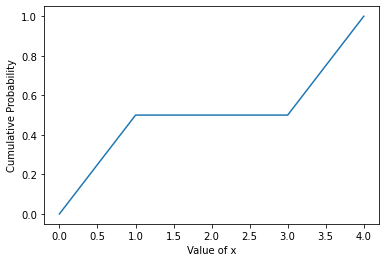

In [213]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

num_el=1000

x = np.linspace(0,4,num_el)
y = np.empty(num_el, dtype=object)

for i in range(num_el):
    if x[i]<=0:
        y[i]=0
    elif 0<x[i] and x[i]<1:
        y[i]=x[i]/2
    elif 1<=x[i] and x[i]<=3:
        y[i]=1/2
    elif 3<x[i] and x[i]<4:
        y[i]=1/2+(x[i]-3)/2
    else:
        y[i]=1
        
plt.plot(x, y)
  
plt.xlabel('Value of x')
plt.ylabel('CDF')
  
plt.show()

We can define the CDF as follows:

$$
F_X(x)=
\begin{cases}
0 &\text{if } x \leq 0 \\
\frac{x}{2} &\text{if } 0 < x \leq 1 \\
\frac{1}{2} &\text{if } 1 < x < 3 \\
\frac{x-3}{2} + \frac{1}{2} &\text{if } 3 \leq x \leq 4 \\
1 &\text{if } x \geq 4 \\
\end{cases}
$$

We can derive over x to obtain $f_X(x)$:
$$
f_X(x)=
\begin{cases}
\frac{1}{2} &\text{if } 0 \leq x \leq 1 \\
\frac{1}{2} &\text{if } 3 \leq x \leq 4 \\
0 &\text{o.w.}  \\
\end{cases}
$$

With those values, we can determine $\mathbb{E}(X)$.

$\mathbb{E}(X)= \int_{0}^{1} \frac{1}{2}x \,dx + \int_{3}^{4} \frac{1}{2}x \,dx$

$\mathbb{E}(X)=2$

**Question 15**: Let $Y_1, Y_2, \dots$ be independent random variables such that $\mathbb{P}(Y_i = 1) = \mathbb{P}(Y_i = -1) = 1/2$.  Let $X_n = \sum_{i=1}^n Y_i$.  Think of $Y_i = 1$ as "the stock price increased by one dollar" $Y_i = -1$ as "the stock price decreased by one dollar" and $X_n$ as the value of the stock on day $n$.

Find 
-  $\mathbb{E}(X_n)$: the expectation of $X_n$ 
- $\mathbb{V}(X_n)$: the variance of $X_n$.

**Solution**:

#### Expectation

We can define the PMF of Y as follows:

$
PMF=
\begin{cases}
\frac{1}{2} &\text{if } y= -1 \\
\frac{1}{2} &\text{if } y= 1 \\
0 &\text{o.w.}  \\
\end{cases}
$

We can use that to calculate the expectation:

$\mathbb{E}[X_n] = \mathbb{E}[\sum_{i=1}^n Y_i]$

Using the linearity property of the expectation, we can define:

$\mathbb{E}[X_n] = \mathbb{E}[Y_1] + \mathbb{E}[Y_2] + ... + \mathbb{E}[Y_n]$

As $Y_1, Y_2, ..., Y_n$ are identically distributed; we can compute $\mathbb{E}[Y_1]$ to determine the expectation for the others.

$\mathbb{E}[Y_1] = \frac{1}{2}*1 + \frac{1}{2}*(-1)$

$\mathbb{E}[Y_1] = 0$

We can then conclude that:

$\mathbb{E}[X_n]=0$


#### Variance

$\mathbb{Var}[X_n] = \mathbb{V}[\sum_{i=1}^n Y_i]$

As $Y_1, Y_2, ..., Y_n$ are independent, we can define:

$\mathbb{Var}[X_n] = \mathbb{Var}[Y_1] + \mathbb{Var}[Y_2] + ... + \mathbb{Var}[Y_n]$

And as they are identically distributed, we can $\mathbb{Var}[Y_1]$ to determine the variance for the other $Y_i$.

$\mathbb{Var}[Y_1] = \mathbb{E}[Y_1^2] - \mathbb{E}[Y_1]^2$

$\mathbb{Var}[Y_1] = 1^2*(\frac{1}{2}) + (-1)^2*(\frac{1}{2}) - 0$

$\mathbb{Var}[Y_1] = 1$

We can then conclude that:

$\mathbb{Var}[X_n]= \mathbb{Var}[Y_1] + \mathbb{Var}[Y_2] + ... + \mathbb{Var}[Y_n] = n$

**Just for Fun: Simulating the Stock Market**  
Simulate $X_n$ and plot $X_n$ versus $n$ for $n = 1, 2, \dots, 1,000$.  Repeat the whole simulation several times.  

In [216]:
# total number of days N
N = 1000
# how many times to repeat the simulation
B = 10

# the shape of Y should be (20, 1000)
Y = 2 * np.random.binomial(n=1, p=1/2, size=(B, N)) - 1

# np.cumsum can calculate X_n = sum_{i=1}^n Y_i
# the shape of X is the same of Y
# X is the observed daily price for B stocks for N days
X = np.cumsum(Y, axis=1)

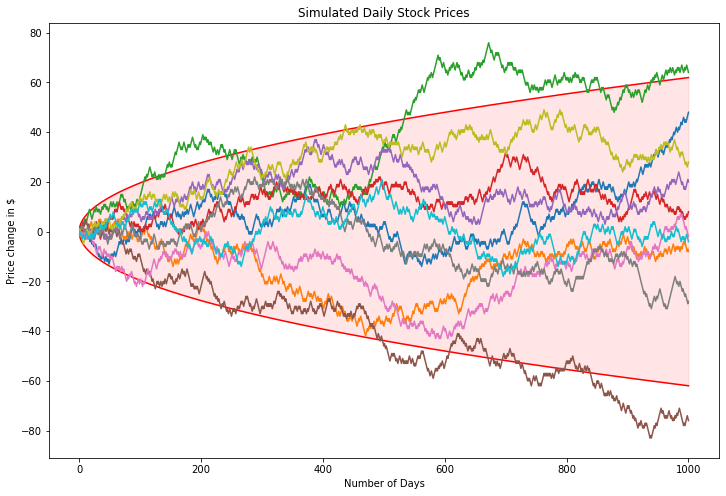

In [217]:
# define the days as a numpy array
t = np.arange(1, N + 1)

# specify the figure size 
plt.figure(figsize=(12, 8))

# 1.96 is a magic number
z = 1.96
# the following 3 lines created a shaded range to predict
# the price change of the stock: the 95% confidence interval
plt.plot(t, z * np.sqrt(t), color='red')
plt.plot(t, -z * np.sqrt(t), color='red')
plt.fill_between(t, z * np.sqrt(t), -z * np.sqrt(t), color='red', alpha=0.1)

# plot each of stock price trajectory simulated
for b in range(B):
    plt.plot(t, X[b])

plt.title("Simulated Daily Stock Prices")
plt.xlabel("Number of Days")
plt.ylabel("Price change in $")
plt.show()

Notice that each simulation price looks very different even though they were generated the same way. Also notice that the predicted price change range (red shaded area) gets wider and wider as number of days increases. What does that mean? How does the calculations of the expectation and variance explain this?

You're done with HW 2!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing LASTNAME with your last name,
* **Upload** your file to the course website.